<a href="https://colab.research.google.com/github/vinodvicki/NETFLIX-MOVIE-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIE_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT NAME** **:** **NETFLIX MOVIE AND TV SHOWS CLUSTERING**

# **PROBLEM STATEMENT** 
**NETFLIX PROBLEM STATEMENT**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is

collected from Flixable which is a third-party Netflix search engine. In 2018, they released an

interesting report which shows that the number of IV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset


# ***Let's Begin !***

### **Import Libraries**

In [1]:
# importing the required libraries
import pandas as pd 
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata
import nltk

#import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime 

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import scipy.cluster.hierarchy as shc

from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

## **1. Dataset loading & overview**

In [2]:
#mounting the google drive to access the files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importing dataset 
Dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets /netflix movie and tv shows data/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [4]:
# Dataset first
Dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
#dataset last
Dataset.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [6]:
# dataset rows & columns
Dataset.shape

(7787, 12)

In [7]:
# dataset info
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
# Dataset Duplicates Value Count()
len(Dataset[Dataset.duplicated()])

0

In [9]:
# missing values/Null values
Dataset.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
#total null values
Dataset.isnull().sum()
     

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<AxesSubplot:>

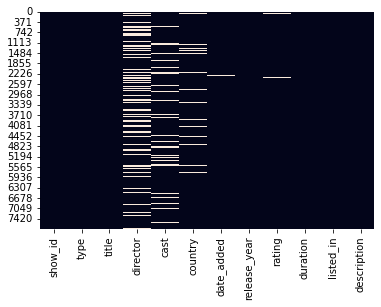

In [11]:
#visualizing the missing values by plotting Heatmap
sns.heatmap(Dataset.isnull(),cbar= False)

#### **knowing About Our Dataset Till Now**

However, based on the previous conversation, the information provided was about a dataset consisting of TV shows and movies available on Netflix as of 2019, collected from a third-party Netflix search engine called Flixable. It was also mentioned that the number of TV shows on Netflix has nearly tripled since 2010, while the number of movies has decreased by more than 2,000 titles.

The above dataset has 7787 rows & 12 columns.there are null values and no duplicate values in dataset

## **2. UNDERSTANDING VARIABLES**

In [12]:
#dataset columns
Dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
#dataset describe 
Dataset.describe(include= 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### vairable description


* **Show Id   :** Unique id for every movie / tv show

* **Type      :** Identfier - A movie or tv show

* **Title     :** Tittle of the movie/show

* **Director  :** Director of the show

* **Cast      :** Actors involved

* **Country   :** Country of production 

* **Date added :** Date it was added on Netflix

* **Release year  :** Actual release year of the show

* **Rating     :** Tv rating of the show 

* **Duration    :** Total duration in minutes or number of seasons

* **Listed in    :** Genre

* **Description  :** The summary description



In [14]:
### checking Unique Values for each Vairable 
for i in Dataset.columns.tolist():
  print("no of unique values in ", i ,"is",Dataset[i].nunique(),".")

no of unique values in  show_id is 7787 .
no of unique values in  type is 2 .
no of unique values in  title is 7787 .
no of unique values in  director is 4049 .
no of unique values in  cast is 6831 .
no of unique values in  country is 681 .
no of unique values in  date_added is 1565 .
no of unique values in  release_year is 73 .
no of unique values in  rating is 14 .
no of unique values in  duration is 216 .
no of unique values in  listed_in is 492 .
no of unique values in  description is 7769 .


## **3. DATA WANGLING**

In [15]:
# Create a copy of the current dataset and assigning to df
df  = Dataset.copy()
df.shape

(7787, 12)

* There are some missing values in cast ,director, country  are replaced with unknown 
* 10 records of missing values of date_added are dropped
* The missing values in rating can be imputed with mode 

In [16]:
# handling missing values 
# missing values in cast ,director, country are replaced with unknown
df[['cast','director','country']] = df[['cast','director','country']].fillna('Unknown')

# imputing null value in rating column with mode
df[['rating']] = df[['rating']].fillna(df['rating'].mode()[0])

#droping null value in date_added 
df.dropna(axis=0 , inplace = True )

In [17]:
df.shape

(7777, 12)

In [18]:
# listed top countrys
df.country.value_counts()

United States                                                   2549
India                                                            923
Unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

In [19]:
# list of genre of shows
df['listed_in'].value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

* There are some movies / TV shows that were filmed in multiple countries, have multiple genres associated with it.
* To simplify the analysis, let's consider only the primary country where that respective movie / TV show was filmed.
* Also, let's consider only the primary genre of the respective movie / TV show.

In [20]:
# choosing the primary country and primary gener to simplify the analysis by using lambada expression

df['country'] =df['country'].apply(lambda x : x.split(',')[0])
df['listed_in'] =df['listed_in'].apply(lambda x : x.split(',')[0])


In [21]:
# country in wich each movie produced
df.country.value_counts()

United States     2877
India              956
United Kingdom     576
Unknown            506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

In [22]:
# gener in shows 
df.listed_in.value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
T

In [23]:
df['duration'].value_counts()

1 Season     1608
2 Seasons     378
3 Seasons     183
90 min        136
93 min        131
             ... 
9 min           1
182 min         1
224 min         1
233 min         1
191 min         1
Name: duration, Length: 216, dtype: int64

### Typecasting duration column from string to integer

In [24]:
# splitting the duration column and changing the data type to integer 
df['duration'] = df['duration'].apply(lambda x : int(x.split()[0]))

In [25]:
#number of seasons for tv shows
df[df['type'] =='TV show'].duration.value_counts()

Series([], Name: duration, dtype: int64)

In [26]:
#movie length in minutes
df[df['type'] == 'Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

In [27]:
#datatype of duration 
df.duration.dtype

dtype('int64')

### Typecasing 'date_added' column from string to datetime

In [28]:
# coverting date_added from sting to datetime
df['date_added'] = pd.to_datetime( df['date_added'] )

In [29]:
#frist & last date on which a show was added on netflix
df.date_added.min(),df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

* the shows are added on netflix 1st jan 2008 to 16th jan 2021 wich means we have data of 13 years

In [30]:
# adding new attributes month and year of date added
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

#droping date_added column from dataset
df.drop('date_added' , axis = 1, inplace = True)

### Rating

In [32]:

df.rating.value_counts()

TV-MA       2868
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

* Highest number of shows on netflix are rated by TV-MA, followed by TV-14 & TV-PG

In [34]:
# age ratings
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [35]:
# changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

# replaceing above vairable values in to rating column
df['rating'].replace(rating_map , inplace = True)
df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

In [37]:
# age rating
df.rating.value_counts()

Adults          3624
Young Adults    1928
Older Kids      1327
Kids             512
Teens            386
Name: rating, dtype: int64

## **4. EXPLORATORY DATA ANALYSIS**

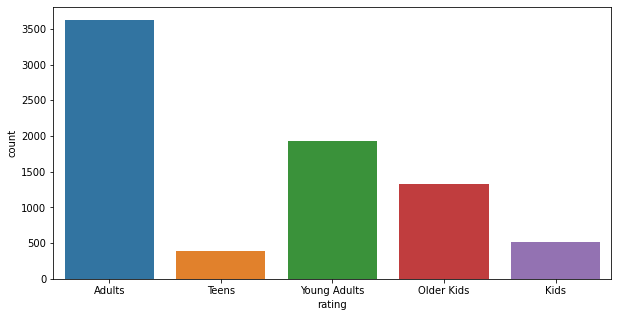

In [40]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating', data=df)
plt.show()

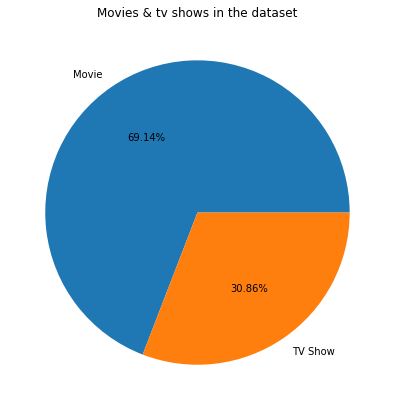

In [49]:
# number of movies & tv shows in the dataset
plt.figure(figsize=(7,7))
# Count values in column of interest
counts = df['type'].value_counts()

# Plot pie chart
plt.pie(counts, labels=counts.index, autopct='%1.2f%%')
plt.title('Movies & tv shows in the dataset')
plt.show()

* There are more movies (69.14%) than TV shows (30.86%) in the dataset.

**THE TOP 10 DIRECTORS IN THE DATASET**

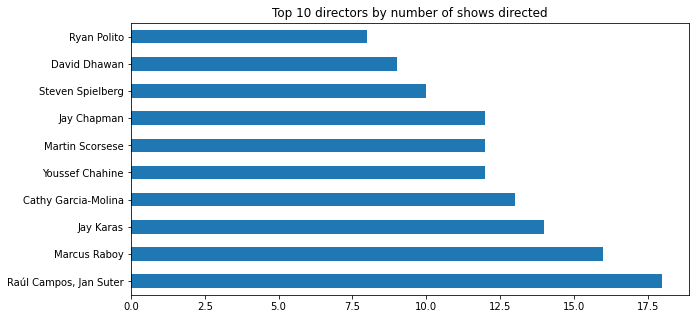

In [56]:
#Top 10 directors in the dataset
plt.figure(figsize=(10,5))
df[~(df['director'] == 'Unknown')].director.value_counts().nlargest(10).plot(kind = 'barh')
plt.title('Top 10 directors by number of shows directed')
plt.show()